In [1]:
import numpy as np
from sklearn.svm import SVC

In [2]:
# 把训练集和测试集导入
filename1 = 'F:/研究生涯/学习/pmi/pmi数据集/pca/99/train10.txt'
filename2 = 'F:/研究生涯/学习/pmi/pmi数据集/pca/99/test10.txt'

In [3]:
train_examples = np.loadtxt(filename1)
test_examples = np.loadtxt(filename2)
# train_labels = np.ones(3474)
train_labels = np.hstack((np.ones(3473), np.zeros(9234)))
# test_labels = np.ones(385)
test_labels = np.hstack((np.ones(386), np.zeros(1027)))

In [4]:
print(type(train_examples), type(train_labels))
print(train_examples.shape, train_labels.shape)
print(train_examples.dtype, train_labels.dtype)
print(train_examples.ndim, train_labels.ndim)

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(12707, 3390) (12707,)
float64 float64
2 1


In [5]:
clf = SVC(kernel='rbf', probability=True)

In [6]:
clf.fit(train_examples, train_labels)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [7]:
predictions = clf.predict(test_examples)

In [8]:
from sklearn.metrics import roc_auc_score
roc_auc_score(test_labels, predictions)

0.5589308867822674

In [9]:
print(predictions)

[0. 0. 1. ... 1. 0. 1.]


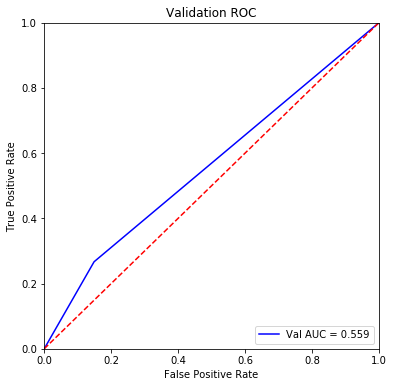

In [10]:
# 画Auc曲线
from sklearn import metrics
import pylab as plt
fpr, tpr, threshold = metrics.roc_curve(test_labels, predictions)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(6,6))
plt.title('Validation ROC')
plt.plot(fpr, tpr, 'b', label = 'Val AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

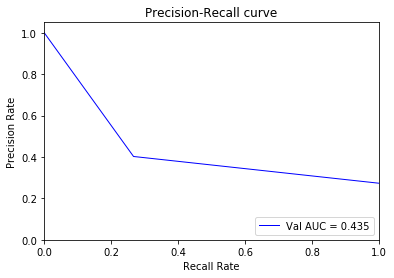

0.43473310693587297


In [11]:
# 画Pr曲线
from sklearn import metrics
from sklearn.metrics import precision_recall_curve
import pylab as plt
precision, recall, _ = precision_recall_curve(test_labels, predictions)
auc = metrics.auc(recall, precision)
plt.plot(recall,precision,'b',lw=1,label = 'Val AUC = %0.3f' % auc)
plt.legend(loc = 'lower right')
plt.title('Precision-Recall curve')

plt.xlabel('Recall Rate')
plt.ylabel('Precision Rate')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.show()

print(auc)

In [45]:
with open("F:/研究生涯/学习/pmi/pmi数据集/pca/99/SVMpre.txt",'ab') as f:
    np.savetxt(f, predictions, delimiter=" ")
with open("F:/研究生涯/学习/pmi/pmi数据集/pca/99/SVMlabel.txt",'ab') as f:
    np.savetxt(f, test_labels, delimiter=" ")